# Partial Results of Simulations

In this notebook we are going to detail how the simulations were designed and some partial results.

## Data Generation

The data generation process began obtaining a raw image and processing it pixel-wise. Then, generating the experiment events and the design matrix with them. With this and the image processed, the voxel-wise BOLD data without noise was obtained. And finally, a procedure to generate noise to the voxel-wise BOLD data is proposed.

All the procedures explained in this section are done by the `generateSimulationData.py` Script.

### Pixel-Wise Processing of Raw Image

The raw activation image was taken from <https://en.m.wikipedia.org/wiki/File:Soccerball.svg> is the $200px \times 200 px$ football drawing shown below:

![ball](./Data/ball.png)

The white pixels were treated as $0$ and the black pixels as $1$, see it below.

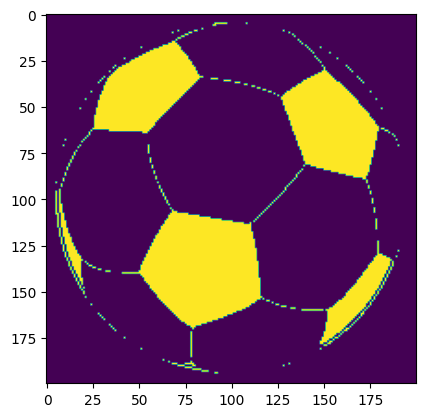

In [11]:
import numpy as np
import fMRIUtils as fmriu
b = np.load('Data/Simulations/Simulations/ball_200.npy')
fmriu.plotImage(b,200,0)

In [2]:
sum(b), sum(b)/2500

(422, 0.1688)

From the $40,000$ pixels the image has, exactly $7975$ are black, hence we will have an approximate of $19.9 \%$ of activation, which is higher than usual fMRI images.

### Experiment Events and Design Matrix

The simulated experiment has 100 scans with 2 seconds between them, for a total of 200 seconds. There are 4 stimulus that last for 10 seconds. The first one occurs randomly within the first 10 to 24 seconds, and the following stimulus occur also randomly with a time difference of 36 to 50 seconds from the previous stimulus. Note that in the worst case scenario, the last stimulus will begin at 174 seconds and will end at 184 seconds. See it below.

<Axes: label='conditions', ylabel='scan number'>

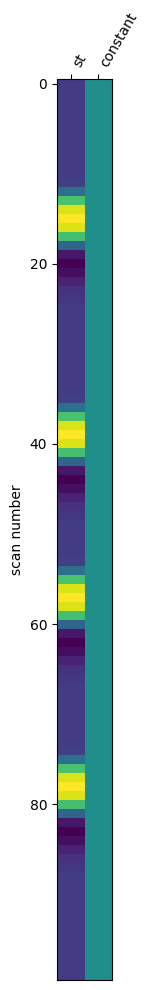

In [24]:
from nilearn.plotting import plot_design_matrix
import pandas as pd

X = pd.read_csv('Data/Simulations/X.csv')
plot_design_matrix(X)


### Voxel-Wise BOLD Data without Noise

The BOLD data was generated by taking the product of the design matrix of dimension $(100,2)$ and $\beta$ vectors of dimension $(2,1)$, where the first element of the vector takes a value of $15$ when the voxel is activated and a value of $0$ when is not. Additionally, the second element of the $\beta$ vector (corresponding to the intercept) is always $128$. This was done for each of the $40000$ voxels. See the BOLD data map below.

In [12]:
import pandas as pd
BOLD = pd.read_csv('Data/Simulations/Simulations/BOLD.csv')
BOLD

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
1,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
2,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
3,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
4,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
96,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
97,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0
98,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,...,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0


In [36]:
(BOLD.iloc[10,:]>100).iloc[5000:5049]

5000    False
5001    False
5002    False
5003    False
5004    False
5005    False
5006    False
5007    False
5008    False
5009    False
5010    False
5011    False
5012    False
5013    False
5014    False
5015    False
5016    False
5017    False
5018    False
5019    False
5020    False
5021    False
5022    False
5023    False
5024    False
5025    False
5026    False
5027    False
5028    False
5029    False
5030    False
5031    False
5032    False
5033    False
5034    False
5035    False
5036    False
5037    False
5038    False
5039    False
5040    False
5041    False
5042    False
5043    False
5044    False
5045    False
5046     True
5047     True
5048     True
Name: 10, dtype: bool

### Generate Noise in BOLD Data

To generate noise in the BOLD data, the `generateSignal()` function was used. This function uses an ARIMA Model to simulate the noise. The noise has a mean value of $0$, a variance of $3$. The values of $P$ and $Q$ were iterated $50$ times from $0$ to $3$ each. This was done for each of the $40000$ voxels. In general, each BOLD data with noise is saved as: `BOLD_PxQyRz.csv` with $x,y \in [0,3]$ and $z \in [1,50]$. See an example below.

In [13]:
BOLD_P0Q0R1 = pd.read_csv('Data/Simulations/Simulations/BOLD_P0Q0R1.csv')
BOLD_P0Q0R1

,0,1,2,3,4,5,6,7,8,9,...,39990,39991,39992,39993,39994,39995,39996,39997,39998,39999
0,95.975795,90.583739,100.777121,103.332916,102.828333,104.607684,100.582060,95.815780,105.055314,112.147528,...,96.894916,100.565475,98.623637,99.466513,95.384452,97.649798,100.498830,99.986522,101.408313,105.140197
1,101.637515,95.140998,101.748852,106.028575,110.052259,97.692981,103.957096,94.448101,96.711014,105.089084,...,102.629231,98.191065,99.873827,98.008717,96.964881,103.611850,95.410355,101.026729,109.008125,100.187314
2,93.048260,94.717096,107.257902,100.980537,95.546769,110.310178,100.436140,110.359509,101.537749,106.396422,...,101.683481,105.124674,97.727119,102.148974,100.311121,107.320502,99.541676,95.311599,105.441897,97.249287
3,100.680876,99.121610,96.870369,100.426921,100.945193,96.573691,104.617674,99.576798,104.119782,95.218680,...,101.202706,99.104986,104.819083,91.619500,98.854910,104.938010,105.223836,109.204702,97.432768,97.734587
4,100.968988,99.984356,97.600613,97.216658,100.605478,99.991347,98.004138,101.711001,93.374433,104.068702,...,98.505317,99.740192,104.014887,103.130048,97.882464,102.167443,102.811427,103.939810,97.561926,105.495773
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,100.406359,100.772969,107.721868,102.300152,101.165832,99.712191,104.772189,99.608305,100.416171,104.315685,...,94.840728,106.876227,109.710150,102.409417,110.917269,103.630690,101.249586,102.482804,101.558172,101.169675
96,99.631046,99.356463,105.347028,105.704137,93.023155,104.612190,92.360319,101.795910,106.038206,97.998434,...,100.922068,96.373229,105.394745,98.379679,106.976791,97.691047,102.591878,95.941462,92.931047,99.559596
97,98.470594,101.564234,101.994028,105.905718,104.676904,106.514530,101.067323,103.003569,100.922298,99.184118,...,99.399449,98.898609,96.873635,96.966391,93.992786,96.067809,104.370794,98.066572,94.859284,100.062903
98,102.972592,97.911831,100.260130,104.073153,98.726640,103.397353,101.608429,98.120836,99.766150,97.825910,...,99.388402,92.327797,98.820751,92.910802,103.680636,101.234100,107.063169,97.524589,102.274824,105.151371


Text(0.5, 0, 'Time (s)')

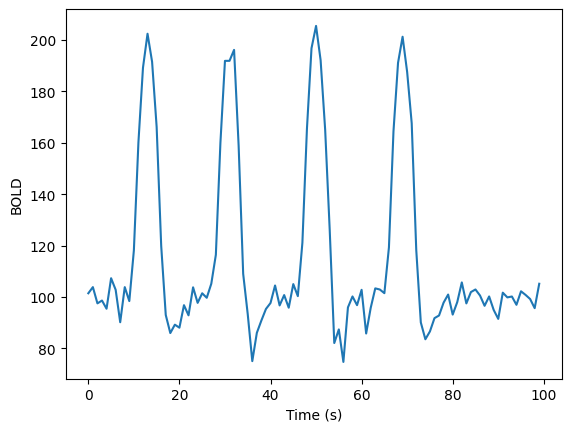

In [37]:
import matplotlib.pyplot as plt
BOLD_P0Q0R1['5046'].plot()
plt.ylabel('BOLD')
plt.xlabel('Time (s)')

#### SNR of the BOLD Data

The Signal-to-Noise Ratio ranges from $6$ to $10$ in $P,Q = 0$.

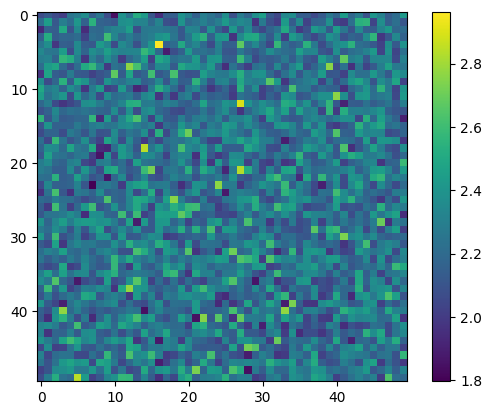

In [6]:
SNR_IM = []
for c in BOLD.columns:
    s1 = BOLD[c].values
    s2 = BOLD_P0Q0R1[c].values
    SNR_IM.append(fmriu.SNR(s2,s1))
SNR_IM = np.array(SNR_IM)

fmriu.plotImage(SNR_IM,50)

The Signal-to-Noise Ratio ranges from $1$ to $6$ in $P,Q = 3$.

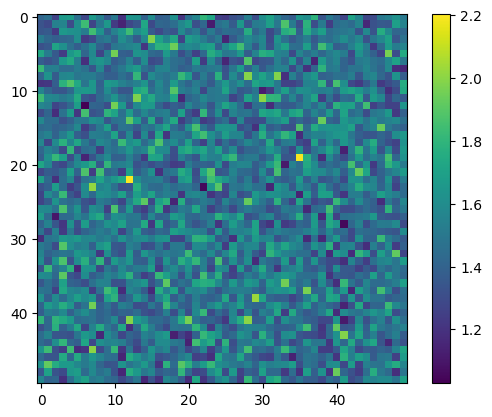

In [7]:
BOLD_P1Q1R1 = pd.read_csv('Data/Simulations/BOLD_P1Q1R1.csv')

SNR_IM = []
for c in BOLD.columns:
    s1 = BOLD[c].values
    s2 = BOLD_P1Q1R1[c].values
    SNR_IM.append(fmriu.SNR(s2,s1))
SNR_IM = np.array(SNR_IM)

fmriu.plotImage(SNR_IM,50)

#### CNR of the BOLD Data

The Contrast-to-Noise Ratio ranges from $6$ to $10$ in $P,Q = 0$.

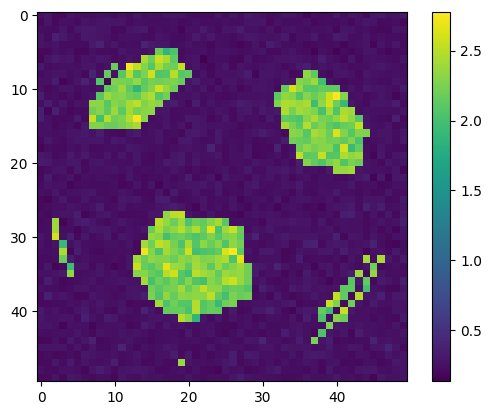

In [8]:
CNR_IM = []
for c in BOLD.columns:
    s1 = BOLD[c].values
    s2 = BOLD_P0Q0R1[c].values
    CNR_IM.append(fmriu.CNR(s2,s1))
CNR_IM = np.array(CNR_IM)

fmriu.plotImage(CNR_IM,50)

The Signal-to-Noise Ratio ranges from $1$ to $6$ in $P,Q = 3$.

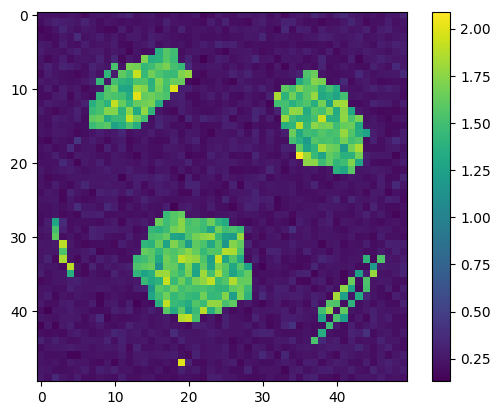

In [9]:
BOLD_P1Q1R1 = pd.read_csv('Data/Simulations/BOLD_P1Q1R1.csv')

CNR_IM = []
for c in BOLD.columns:
    s1 = BOLD[c].values
    s2 = BOLD_P1Q1R1[c].values
    CNR_IM.append(fmriu.CNR(s2,s1))
CNR_IM = np.array(CNR_IM)

fmriu.plotImage(CNR_IM,50)

## Bayesian Model

The Bayesian Model takes the BOLD data with noise of each run and the design matrix in order to estimate the values of the $\beta$ vectors a $1000$ times. Then, a frequency probability is calculated to obtain the probability of having the first element of the vector greather than $0$. All this process is done for each voxel, obtaining then a probability map that can be interpreted as the probability of having the voxels activated. See an example below.

All the procedures explained in this section are done by the `bayesianModel.py` Script.

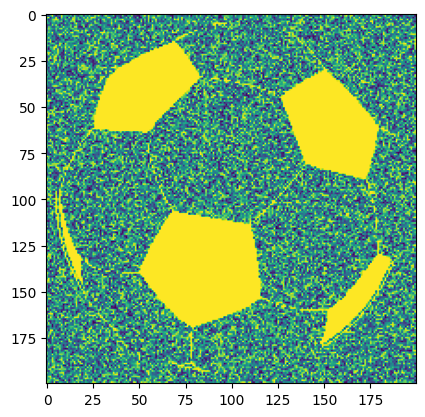

In [43]:
stProb_P0Q0 = pd.read_csv('Data/Simulations/Simulations/pMaps_P0Q0.csv')
r1_stProb_P0Q0 = stProb_P0Q0.loc[0,:].values

fmriu.plotImage(r1_stProb_P0Q0,200,0)

## Threesholding and Smoothing

The threesholding and smoothing algorithm takes the probability map obtained in each run and at the same time eliminates the noise of the map and generates a threeshold probability that indicates whether each voxel is truly activated or not. The algorithm uses the Jaccard index of the generated images to terminate. The results are stored in four files for each run, these are:

- `Zeta_PxQyRz.npy`: Contains the activation map in each iteration
- `eta_PxQyRz.npy`: Contains the threeshold value in each iteration
- `N_PxQyRz.npy`: Contains the number of inactive voxels in each iteration
- `X_PxQyRz.npy`: Contains the probability maps in each iteration

See an example of the results below.

All the procedures explained in this section are done by the `th_sm.py` Script.

### Last activation map

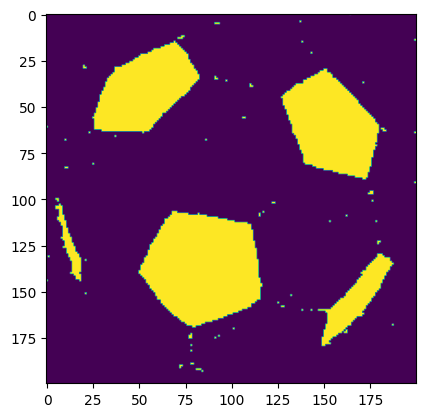

In [49]:
Zeta_P0Q0R1 = np.load('Data/Simulations/Simulations/Zeta_P0Q0R1.npy')
fmriu.plotImage(Zeta_P0Q0R1[9],200,0)

In [43]:
X_P0Q0R1[3].mean(),X_P0Q0R1[3].std()

(0.5928304000000002, 0.1813249343361305)

### Threeshold values

In [45]:
eta_P0Q0R1 = np.load('Data/Simulations/Simulations/eta_P0Q0R1.npy')
eta_P0Q0R1

array([0.79949168, 0.78254099, 0.77462376, 0.77061095, 0.76754061,
       0.76469801, 0.76182766, 0.75881487, 0.75560064])

### Number of inactive voxels in each iteration

In [38]:
N_P0Q0R1 = np.load('Data/Simulations/N_P0Q0R1.npy')
N_P0Q0R1

array([2500, 1896, 1896, 1893])

### Last Probability Map

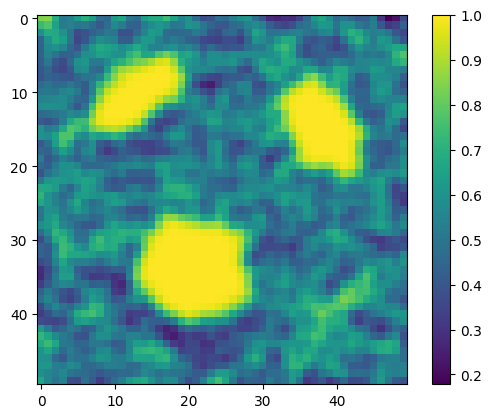

In [39]:
X_P0Q0R1 = np.load('Data/Simulations/X_P0Q0R1.npy')
fmriu.plotImage(X_P0Q0R1[3],50)

## Other Results

The Jaccard Index between the original image and the final probability map can be easily calculated

In [50]:
import fMRIUtils as fmriu
fmriu.jaccardIndex(Zeta_P0Q0R1[9],b)

0.9241607449154619

# Simulation General Analysis

## Run 092623

In [1]:
path = 'Data/Simulations/Run092623/'

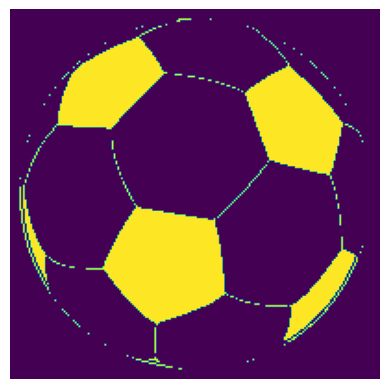

In [2]:
import numpy as np
import fMRIUtils as fmriu
import matplotlib.pyplot as plt
fn_ball = path + 'ball_200.npy'
ball_200 = np.load(fn_ball)
fmriu.plotImage(ball_200,200,0)

In [3]:
import pandas as pd
fn_bold = path + 'BOLD.csv'
bold = pd.read_csv(fn_bold)
P,Q,R = [],[],[]
SNR,CNR,Ji = [],[],[]
K,Eta = [],[]
for p in range(4):
    for q in range(4):
        for r in range(2):
            P.append(p)
            Q.append(q)
            R.append(r+1)
            fn_zeta = path + 'Zeta_P' + str(p) + 'Q' + str(q) + 'R' + str(r+1) + '.npy'
            zeta = np.load(fn_zeta)
            k = len(zeta) - 1
            K.append(k)
            Ji.append(fmriu.jaccardIndex(zeta[k],ball_200))
            fn_eta = path + 'eta_P' + str(p) + 'Q' + str(q) + 'R' + str(r+1) + '.npy'
            eta = np.load(fn_eta)
            Eta.append(eta[k-1])
            fn_boldpqr = path + 'BOLD_P' + str(p) + 'Q' + str(q) + 'R' + str(r+1) + '.csv'
            boldpqr = pd.read_csv(fn_boldpqr)
            SNRs = []
            CNRs = []
            for c in boldpqr.columns:
                SNRs.append(fmriu.SNR(boldpqr[c],bold[c]))
                CNRs.append(fmriu.CNR(boldpqr[c],bold[c]))
            SNR.append(np.mean(SNRs))
            CNR.append(np.mean(CNRs))
df = pd.DataFrame({'p':P,'q':Q,'r':R,'snr':SNR,'cnr':CNR,'k':K,'eta':Eta,'Ji':Ji})
df

,p,q,r,snr,cnr,k,eta,Ji
0,0,0,1,22.561640,6.536976,9,0.755601,0.924161
1,0,0,2,22.570352,6.534188,9,0.755640,0.924385
2,0,1,1,20.315085,6.098048,8,0.758503,0.908458
3,0,1,2,20.318377,6.095958,6,0.763196,0.910301
4,0,2,1,19.729042,5.968286,8,0.757234,0.903890
5,0,2,2,19.725444,5.968164,9,0.754484,0.896098
6,0,3,1,19.711083,5.970449,7,0.762700,0.897665
7,0,3,2,19.685064,5.958463,7,0.760647,0.897794
8,1,0,1,19.861312,5.992360,7,0.762670,0.891552
9,1,0,2,19.847360,5.992120,6,0.766109,0.897003


In [4]:
fn_save = path + 'summaryFixed.csv'
df.to_csv(fn_save,index=False)

## Run 101723

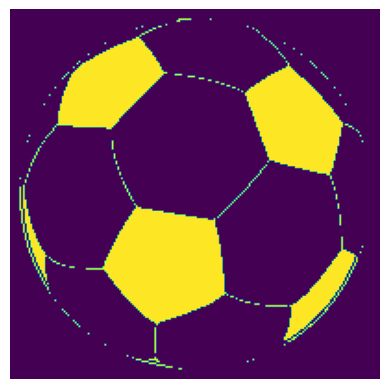

In [1]:
import numpy as np
import fMRIUtils as fmriu
import matplotlib.pyplot as plt
path = 'Data/Simulations/Run101723/'
fn_ball = path + 'ball_200.npy'
ball_200 = np.load(fn_ball)
fmriu.plotImage(ball_200,200,0)

In [7]:
import pandas as pd
fn_bold = path + 'BOLD.csv'
bold = pd.read_csv(fn_bold)
P,Q,R = [],[],[]
SNR,CNR,Ji = [],[],[]
K,Eta = [],[]
for p in range(4):
    for q in range(4):
        for r in range(2):
            P.append(p)
            Q.append(q)
            R.append(r+1)
            fn_zeta = path + 'Zeta_P' + str(p) + 'Q' + str(q) + 'R' + str(r+1) + '.npy'
            zeta = np.load(fn_zeta)
            k = len(zeta) - 1
            K.append(k)
            Ji.append(fmriu.jaccardIndex(zeta[k],ball_200))
            fn_eta = path + 'eta_P' + str(p) + 'Q' + str(q) + 'R' + str(r+1) + '.npy'
            eta = np.load(fn_eta)
            Eta.append(eta[k-1])
            fn_boldpqr = path + 'BOLD_P' + str(p) + 'Q' + str(q) + 'R' + str(r+1) + '.csv'
            boldpqr = pd.read_csv(fn_boldpqr)
            SNRs = []
            CNRs = []
            for c in boldpqr.columns:
                SNRs.append(fmriu.SNR(boldpqr[c],bold[c]))
                CNRs.append(fmriu.CNR(boldpqr[c],bold[c]))
            SNR.append(np.mean(SNRs))
            CNR.append(np.mean(CNRs))
df = pd.DataFrame({'p':P,'q':Q,'r':R,'snr':SNR,'cnr':CNR,'k':K,'eta':Eta,'Ji':Ji})
df

,p,q,r,snr,cnr,k,eta,Ji
0,0,0,1,4.085835,3.032654,9,0.755959,0.926220
1,0,0,2,4.087525,3.033459,7,0.760763,0.924496
2,0,1,1,3.559872,2.791602,7,0.761873,0.906134
3,0,1,2,3.561359,2.786336,8,0.758272,0.907047
4,0,2,1,3.469135,2.768712,5,0.767890,0.904745
5,0,2,2,3.462651,2.765707,8,0.757347,0.904255
6,0,3,1,3.458250,2.763609,7,0.761444,0.897202
7,0,3,2,3.458812,2.764318,8,0.753660,0.900167
8,1,0,1,3.484566,2.765244,7,0.757173,0.895352
9,1,0,2,3.486012,2.767082,7,0.756714,0.901853


In [8]:
fn_save = path + 'summary.csv'
df.to_csv(fn_save,index=False)

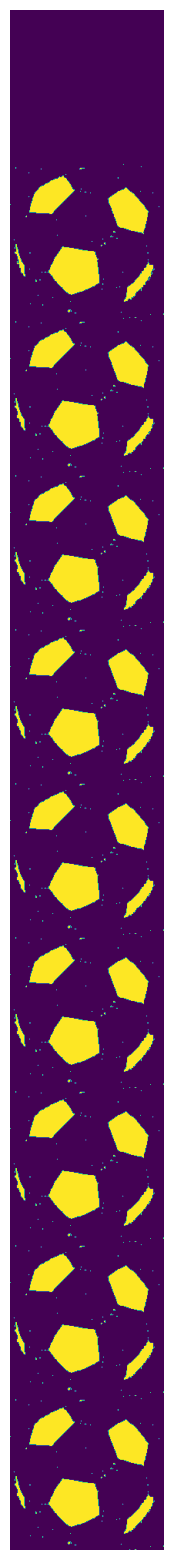

<Figure size 640x480 with 0 Axes>

In [9]:
import matplotlib.pyplot as plt
path = 'Data/Simulations/Run101723/'
fn_zeta = path + 'Zeta_P0Q0R1.npy'
plt.figure(figsize=(2,20))
zeta = np.load(fn_zeta)
fmriu.plotImage(zeta,200,0)
plt.savefig('aMaps.png', bbox_inches='tight')


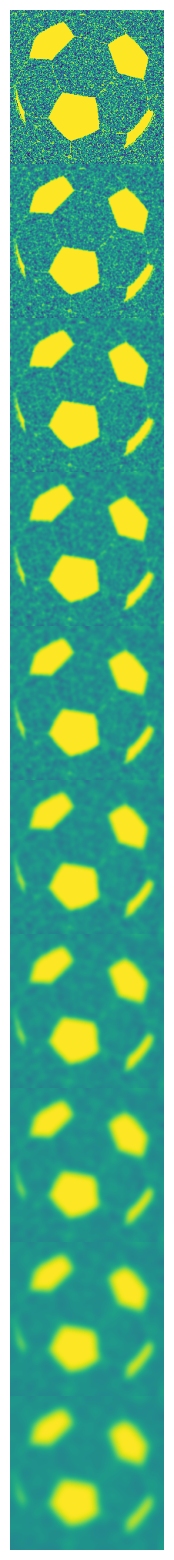

In [10]:
path = 'Data/Simulations/Run101723/'
fn_X = path + 'X_P0Q0R1.npy'
X = np.load(fn_X)
plt.figure(figsize=(2,20))
fmriu.plotImage(X,200,0)

## Summary

In [9]:
import pandas as pd
df1 = pd.read_csv('Data/Simulations/Run092623/summaryFixed.csv')
df2 = pd.read_csv('Data/Simulations/Run101723/summary.csv')

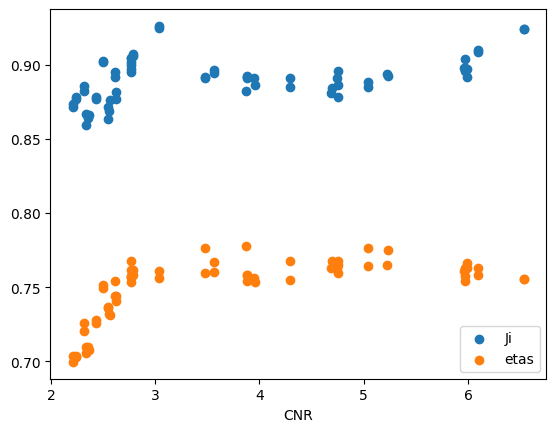

In [40]:
import matplotlib.pyplot as plt
cnrs = list(df2['cnr'].values)+list(df1['cnr'].values)
jis = list(df2['Ji'].values)+list(df1['Ji'].values)
etas = list(df2['eta'].values)+list(df1['eta'].values)

#color = np.array(cnrs)/max(cnrs)

plt.scatter(cnrs,jis,label='Ji')
plt.scatter(cnrs,etas,label='etas')
plt.xlabel('CNR')
plt.legend()
#plt.ylabel('Ji')

Text(0, 0.5, 'k')

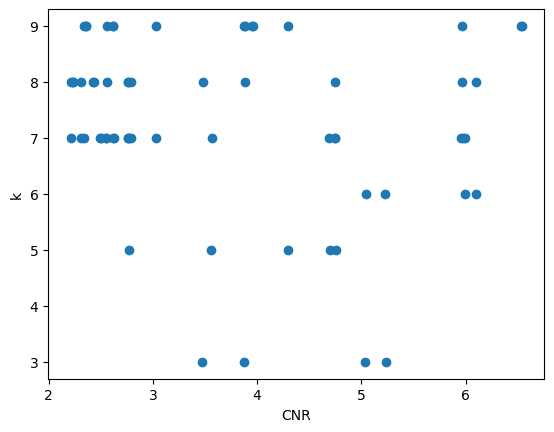

In [41]:
import matplotlib.pyplot as plt
cnrs = list(df2['cnr'].values)+list(df1['cnr'].values)
ks = list(df2['k'].values)+list(df1['k'].values)

plt.scatter(cnrs,ks)
plt.xlabel('CNR')
#plt.legend()
plt.ylabel('k')

,p,q,r,snr,cnr,k,eta,Ji
0,0,0,1,22.561640,6.536976,9,0.755601,0.924161
1,0,0,2,22.570352,6.534188,9,0.755640,0.924385
2,0,1,1,20.315085,6.098048,8,0.758503,0.908458
3,0,1,2,20.318377,6.095958,6,0.763196,0.910301
4,0,2,1,19.729042,5.968286,8,0.757234,0.903890
5,0,2,2,19.725444,5.968164,9,0.754484,0.896098
6,0,3,1,19.711083,5.970449,7,0.762700,0.897665
7,0,3,2,19.685064,5.958463,7,0.760647,0.897794
8,1,0,1,19.861312,5.992360,7,0.762670,0.891552
9,1,0,2,19.847360,5.992120,6,0.766109,0.897003


# Other things

<Axes: >

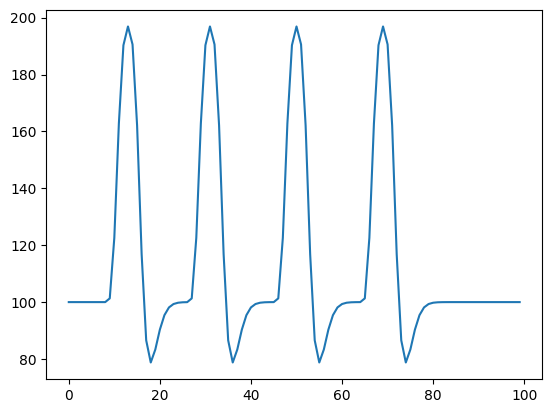

In [23]:
from statsmodels.tsa.arima.model import ARIMA as ARIMA
bold['25500'].plot()

In [48]:
import numpy as np
from numba import njit, prange
import time

@njit(parallel=True, fastmath=True)
def mat_mult(A, B):
    assert A.shape[1] == B.shape[0]
    res = np.zeros((A.shape[0], B.shape[1]), )
    for i in prange(A.shape[0]):
        for k in range(A.shape[1]):
            for j in range(B.shape[1]):
                res[i,j] += A[i,k] * B[k,j]
    return res

In [50]:
m, n, c = 1000, 1500, 1200
A = np.random.randint(1, 50, size = (m, n))
B = np.random.randint(1, 50, size = (n, c))

start1 = time.time()
res1 = mat_mult(A, B)
end1 = time.time()
print('With numba: ',end1-start1, ' seconds')
start2 = time.time()
res2 = A@B
end2 = time.time()
print('With numpy: ',end2-start2, ' seconds')

With numba:  0.40625  seconds
With numpy:  1.6153671741485596  seconds


In [49]:
@njit
def mat_inv(M):
    return(np.linalg.inv(M))

In [51]:
A = np.random.randint(1, 50, size = (m, m)).astype(float)
start1 = time.time()
res1 = mat_inv(A)
end1 = time.time()
print('With numba: ',end1-start1, ' seconds')
start2 = time.time()
res2 = np.linalg.inv(A)
end2 = time.time()
print('With numpy: ',end2-start2, ' seconds')

With numba:  0.09767413139343262  seconds
With numpy:  0.2915189266204834  seconds
